In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

In [3]:
df_dem = pd.read_csv("~/data/connectivityml/unrestricted_pkalra_7_26_2021_17_39_25.csv") 

In [4]:
df_dem.head()

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88


In [5]:
print(df_dem.shape)
print(df_dem.columns.shape)

#1206 subjects
#582 demographics values

(1206, 582)
(582,)


In [6]:
#if desired for inspection, see all demographics and other items included in in demographics file

#for col_name in df_dem.columns: 
    #print(col_name)

In [7]:
df_conn_symm = pd.read_csv("~/data/connectivityml/HCP_PTN1200/netmats/3T_HCP1200_MSMAll_d100_ts2/netmats2.txt", sep=" ", header=None) 

In [14]:
df_conn_symm.shape

#1003 subjects
#100x100 connectivity partial correlations

(1003, 10000)

In [107]:
#Code from Pradyumna to delete lower triangle of connectivity matrix

p = df_conn_symm.shape[0]
N = np.sqrt(df_conn_symm.shape[1]).astype(int)

mat = np.transpose(df_conn_symm.values.reshape(p,N,N),[1,2,0])
print(mat.shape)
indx = np.triu_indices(N,1)
mat2 = np.transpose(mat[indx],[1,0])
print(mat2.shape)

df_conn = pd.DataFrame(data=mat2)

(100, 100, 1003)
(1003, 4950)


In [109]:
print(indx[0].shape)
print(indx[1].shape)

#this means that indx[0] will have the old row coordinate at the 0-4949th position
#and that indx[1] will have the old col coordinate at the 0-4949th position

(4950,)
(4950,)


In [24]:
df_id = pd.read_csv("~/data/connectivityml/HCP_PTN1200/subjectIDs.txt", sep=" ", header=None) 

In [25]:
df_id.shape

(1003, 1)

In [29]:
df_conn.head()

,0,1,2,3,4,5,6,7,8,9,...,4940,4941,4942,4943,4944,4945,4946,4947,4948,4949
0,0.616760,9.5727,-5.4959,0.34639,3.0090,3.2134,1.1298,1.58890,-2.33410,-2.8051,...,-1.73550,0.27223,0.951410,1.66720,1.252500,0.91888,0.14911,-0.30947,3.0171,0.26007
1,-0.296640,17.3170,-9.0467,-0.28723,1.3473,1.0459,1.7133,0.49141,-0.29712,-4.8876,...,-3.09790,0.88086,-0.458690,-0.40272,-0.469060,0.52597,-0.38607,1.38910,3.0958,1.29190
2,1.648600,6.6189,-8.8877,1.43370,1.0060,2.1167,2.4575,-0.11689,1.96460,-6.6919,...,-2.65750,2.13190,-0.002272,0.83097,-0.870420,0.23547,-1.69360,0.58013,2.8515,-2.08240
3,-0.902750,7.7215,-8.3907,3.31440,2.9395,3.4270,6.7093,1.36210,-2.66980,-11.3190,...,-2.78020,1.50210,0.454560,-0.29930,0.938750,-0.44967,0.46776,0.49353,2.4837,0.59513
4,-0.088768,9.4979,-10.4120,1.06460,4.3362,1.7206,4.5520,3.19110,-3.30900,-9.6999,...,-0.61259,0.99263,-0.897970,0.51453,-0.002975,-1.18320,-0.40380,0.56473,1.2692,1.19840


In [30]:
df_id.rename(columns={ df_id.columns[0]: "Subject" },inplace = True)
df_id.head()

,Subject
0,100206
1,100307
2,100408
3,100610
4,101006


In [31]:
df_conn_id = pd.concat([df_id, df_conn], axis=1)
print(df_conn_id.shape)
df_conn_id.head()

(1003, 4951)


,Subject,0,1,2,3,4,5,6,7,8,...,4940,4941,4942,4943,4944,4945,4946,4947,4948,4949
0,100206,0.616760,9.5727,-5.4959,0.34639,3.0090,3.2134,1.1298,1.58890,-2.33410,...,-1.73550,0.27223,0.951410,1.66720,1.252500,0.91888,0.14911,-0.30947,3.0171,0.26007
1,100307,-0.296640,17.3170,-9.0467,-0.28723,1.3473,1.0459,1.7133,0.49141,-0.29712,...,-3.09790,0.88086,-0.458690,-0.40272,-0.469060,0.52597,-0.38607,1.38910,3.0958,1.29190
2,100408,1.648600,6.6189,-8.8877,1.43370,1.0060,2.1167,2.4575,-0.11689,1.96460,...,-2.65750,2.13190,-0.002272,0.83097,-0.870420,0.23547,-1.69360,0.58013,2.8515,-2.08240
3,100610,-0.902750,7.7215,-8.3907,3.31440,2.9395,3.4270,6.7093,1.36210,-2.66980,...,-2.78020,1.50210,0.454560,-0.29930,0.938750,-0.44967,0.46776,0.49353,2.4837,0.59513
4,101006,-0.088768,9.4979,-10.4120,1.06460,4.3362,1.7206,4.5520,3.19110,-3.30900,...,-0.61259,0.99263,-0.897970,0.51453,-0.002975,-1.18320,-0.40380,0.56473,1.2692,1.19840


In [32]:
df_dem_id= pd.merge_ordered(df_id, df_dem, left_by='Subject')
print(df_dem_id.shape)
df_dem_id.head()

(1003, 582)


,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
1,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
2,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
3,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88
4,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,6.0,122.25,111.41,0.0,38.6,123.80,123.31,1.80,0.0,1.80


In [33]:
#function to spit out x and y for ML models depending on what we want to predict
#filters out na values
def define_X_y(desired_y,dem_id=df_dem_id,conn_id=df_conn_id):
    X = conn_id[dem_id[desired_y].notnull()].drop(['Subject'], axis=1)
    temp_y = dem_id[dem_id[desired_y].notnull()]
    y = temp_y[desired_y]
    print(X.shape)
    print(temp_y.shape)
    print(y.shape)
    return X,y

In [34]:
X_mars,y_mars = define_X_y("Mars_Final")

(998, 4950)
(998, 582)
(998,)


In [35]:
# the linear_model modules contains many other linear estimators
from sklearn.linear_model import LinearRegression 

# initialize the estimator
model_mars = LinearRegression()

In [36]:
# Fit the model, passing in X and y
model_mars.fit(X_mars, y_mars)

LinearRegression()

In [37]:
y_pred = model_mars.predict(X_mars)

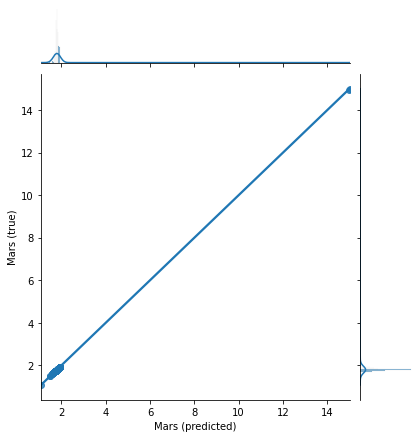

In [38]:
# We're using seaborn, a high-level plotting library that makes it
# extremely easy to generate complex, elegant visualizations.
g = sns.jointplot(x=y_pred, y=y_mars, kind="reg").set_axis_labels("Mars (predicted)", "Mars (true)")

In [39]:
# the metrics module contains predefined scoring functions
# for commonly used metrics like r^2, MSE, etc. but you
# can use any function you like as long as it has the
# signature used in the r2_score call below
from sklearn.metrics import r2_score

# Generate predicted values so we can compare them with
# the ground truth.
y_pred = model_mars.predict(X_mars)

# scoring functions are called by passing an array of
# true scores and and an array of predicted scores as
# inputs
r2_score(y_mars, y_pred)

1.0

In [40]:
model_mars.score(X_mars,y_mars)

1.0

In [41]:
from sklearn.model_selection import cross_val_score

r2_cv = cross_val_score(model_mars, X_mars, y_mars, cv=5)
print(r2_cv)

[-41.50068929 -36.69622371  -0.08621546  -0.07455154 -40.24283327]


In [42]:
X_gend,y_gend = define_X_y("Gender")

(1003, 4950)
(1003, 582)
(1003,)


In [55]:
# the linear_model modules contains many other linear estimators
from sklearn.linear_model import LogisticRegression 

# initialize the estimator
model_gend = LogisticRegression(max_iter=400)

In [56]:
model_gend.fit(X_gend,y_gend)
model_gend.score(X_gend, y_gend)

1.0

In [59]:
r2_cv = cross_val_score(model_gend, X_gend, y_gend, cv=20)
print(r2_cv)

[1.         0.98039216 0.96078431 0.96       0.96       0.94
 0.98       0.96       0.98       0.98       1.         0.94
 0.98       0.94       0.96       0.98       1.         0.98
 0.96       1.        ]


In [87]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


model_forest_gend = RandomForestClassifier()
model_forest_gend.fit(X_gend, y_gend)

RandomForestClassifier()

In [88]:
r2_cv = cross_val_score(model_forest_gend, X_gend, y_gend, cv=5)
print(r2_cv)

[0.85572139 0.7960199  0.8358209  0.795      0.815     ]


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_gend, y_gend, test_size = 0.2, stratify=y_gend)

In [155]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [156]:
y_pred = model.predict(X_test)

score = model.score(X_test, y_test)
print("Test accuracy:", np.round(score*100,2),"%") 

Test accuracy: 79.1 %


In [157]:
confusion_matrix(y_test, y_pred)

#Confusion matrix: count of true negatives, false negatives, true positives and false positives. 
#Not sure which of M and F is considered positive and which negative

array([[98,  9],
       [33, 61]])

In [161]:
y_gend.value_counts()['M']/1003

#dataset is fairly balanced
#confusion matrix indicates one gender is more likely misclassified

0.4675972083748754

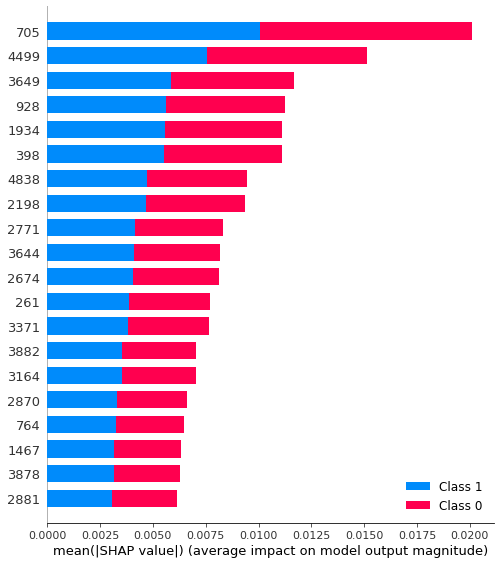

In [162]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [130]:
#explore the top shap predictor (3164):

print(indx[0][3164])
print(indx[1][3164])

39
84


In [170]:
model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 1.77101144e-04, ...,
       4.95400390e-05, 1.85860673e-04, 8.94704370e-05])

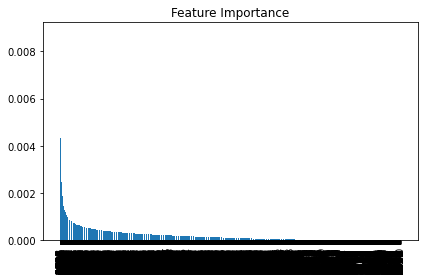

In [172]:
import matplotlib.pyplot as plt


importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()